In [1]:
!pip install -q --upgrade torch diffusers transformers accelerate
!git clone https://github.com/putuoka/StableDiffusionXLReferencePipeline.git

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 989.1/989.1 kB 8.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 29.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.2/251.2 kB 29.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 31.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 44.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 49.9 MB/s eta 0:00:00
Cloning into 'StableDiffusionXLReferencePipeline'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 6 (delta 0), reused 6 (delta 0), pack-reused 0
Receiving objects: 100% (6/6), 7.13 KiB | 7.13 MiB/s, done.


In [1]:
import sys
sys.path.append('/content/StableDiffusionXLReferencePipeline')


In [2]:
import torch
from PIL import Image
from stable_diffusion_xl_reference import StableDiffusionXLReferencePipeline
from diffusers.utils import load_image
from diffusers import DiffusionPipeline
from diffusers.schedulers import UniPCMultistepScheduler




In [3]:

pipe = StableDiffusionXLReferencePipeline.from_pretrained(
    "Lykon/dreamshaper-xl-1-0",
    torch_dtype=torch.float16,
    use_safetensors=True,
    variant="fp16",
    device_map="auto"
    )

pipe.scheduler = UniPCMultistepScheduler.from_config(pipe.scheduler.config)

Fetching 18 files:   0%|          | 0/18 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [4]:
input_image = load_image("https://hf.co/datasets/huggingface/documentation-images/resolve/main/diffusers/input_image_vermeer.png")


In [5]:

result_img = pipe(ref_image=input_image,
      prompt="1girl",
      num_inference_steps=20,
      reference_attn=True,
      reference_adain=True,
      original_size=(4096,4096),
      target_size=(1024,1024)
                  ).images[0]

  0%|          | 0/20 [00:00<?, ?it/s]

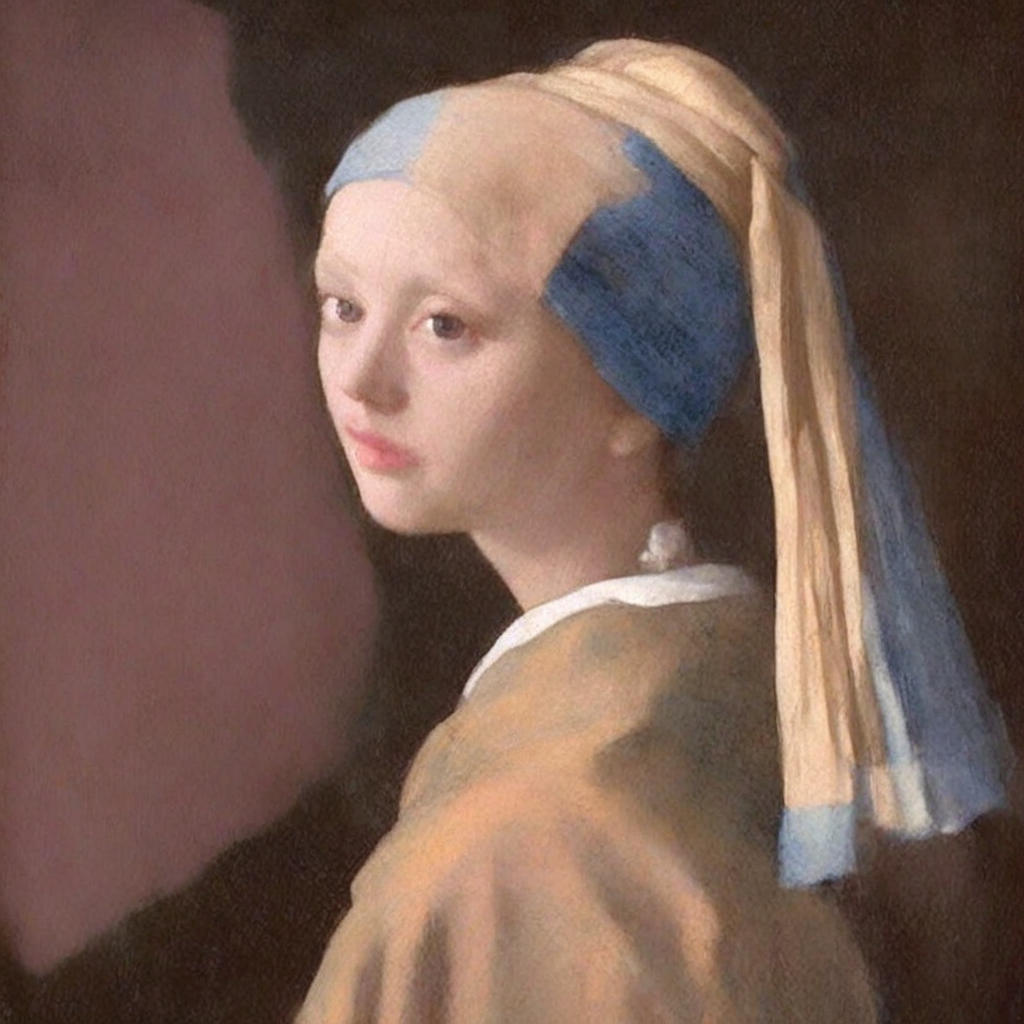

In [6]:
result_img